In [3]:
from recipe_rec import recipes, unique_ingredients
from recipe_rec.recipe2vec import Recipe2Vec
import itertools
import pickle

# Effect of Alpha and Num. Epochs on Loss Stabilisation

In [12]:
# # systems = {}

# alphas = [0.025, 0.0025, 0.25]
# epochs = [300]

# # losses = {}
# # models = []
# for alpha, num_epochs in list(itertools.product(alphas, epochs)):
#     model = Recipe2Vec(
#         # model_path="./recipe_rec/data/recipe2vec_42d574c155524a28a8ae6ee691d96e85.model",
#         alpha=alpha,
#         num_epochs=num_epochs,
#         # index_path="./recipe_rec/data/recipe2vec_7153b2f49949474495fd9ffe8b340baf.ann",
#         verbose=True,
#     )

#     training_losses = model.training_losses

#     # losses[(alpha, num_epochs)] = training_losses

#     print(training_losses)

#     models.append(model)

INFO:recipe_rec.recipe2vec:Training Word2Vec model.
INFO:recipe_rec.recipe2vec:Completed epoch 1.
INFO:recipe_rec.recipe2vec:Completed epoch 2.
INFO:recipe_rec.recipe2vec:Completed epoch 3.
INFO:recipe_rec.recipe2vec:Completed epoch 4.
INFO:recipe_rec.recipe2vec:Completed epoch 5.
INFO:recipe_rec.recipe2vec:Completed epoch 6.
INFO:recipe_rec.recipe2vec:Completed epoch 7.
INFO:recipe_rec.recipe2vec:Completed epoch 8.
INFO:recipe_rec.recipe2vec:Completed epoch 9.
INFO:recipe_rec.recipe2vec:Completed epoch 10.
INFO:recipe_rec.recipe2vec:Completed epoch 11.
INFO:recipe_rec.recipe2vec:Completed epoch 12.
INFO:recipe_rec.recipe2vec:Completed epoch 13.
INFO:recipe_rec.recipe2vec:Completed epoch 14.
INFO:recipe_rec.recipe2vec:Completed epoch 15.
INFO:recipe_rec.recipe2vec:Completed epoch 16.
INFO:recipe_rec.recipe2vec:Completed epoch 17.
INFO:recipe_rec.recipe2vec:Completed epoch 18.
INFO:recipe_rec.recipe2vec:Completed epoch 19.
INFO:recipe_rec.recipe2vec:Completed epoch 20.
INFO:recipe_rec.r

[312334.125, 324981.75, 330824.6875, 334974.71875, 337994.8125, 340381.1875, 342044.375, 343437.84375, 344664.28125, 345788.15625, 346481.875, 347191.09375, 347884.0625, 348433.78125, 349004.40625, 349566.40625, 350025.96875, 350431.3125, 350845.875, 351191.9375, 351469.625, 351714.15625, 351935.84375, 352150.15625, 352367.375, 352564.1875, 352812.78125, 353039.46875, 353328.375, 353695.15625, 353869.15625, 354053.8125, 354267.40625, 354450.78125, 354642.40625, 354824.0, 354982.0625, 355155.53125, 355307.4375, 355420.5625, 355506.34375, 355634.34375, 355724.40625, 355819.21875, 355965.53125, 356064.09375, 356184.15625, 356274.46875, 356350.46875, 356447.21875, 356516.1875, 356558.6875, 356617.1875, 356701.0, 356754.9375, 356814.25, 356869.84375, 356931.6875, 357010.75, 357048.59375, 357110.28125, 357147.90625, 357198.125, 357250.15625, 357288.5625, 357351.9375, 357403.6875, 357449.3125, 357502.75, 357594.09375, 357641.15625, 357672.03125, 357718.71875, 357746.28125, 357784.34375, 35779

In [5]:
# for loss in losses:
#     print(loss)
#     print(losses[loss])

(0.025, 300)
[7702177.0, 14090083.0, 19745694.0, 24939588.0, 30220906.0, 34589404.0, 37520908.0, 40456656.0, 43333068.0, 46249572.0, 49160392.0, 52096232.0, 55001256.0, 57881800.0, 60784484.0, 63680464.0, 66560140.0, 67257112.0, 67443120.0, 67625232.0, 67806296.0, 67989544.0, 68174384.0, 68361968.0, 68549896.0, 68737688.0, 68921016.0, 69105000.0, 69291016.0, 69478576.0, 69665104.0, 69854992.0, 70041368.0, 70226928.0, 70414968.0, 70600608.0, 70790216.0, 70975648.0, 71163392.0, 71352952.0, 71540768.0, 71731072.0, 71919112.0, 72099040.0, 72284864.0, 72469272.0, 72654104.0, 72844328.0, 73026728.0, 73214744.0, 73405032.0, 73589960.0, 73775544.0, 73959016.0, 74142344.0, 74326664.0, 74511728.0, 74696024.0, 74879024.0, 75065144.0, 75251568.0, 75439440.0, 75619664.0, 75806704.0, 75990840.0, 76171072.0, 76355560.0, 76541272.0, 76728800.0, 76913040.0, 77096712.0, 77280648.0, 77469392.0, 77656248.0, 77838336.0, 78022112.0, 78210440.0, 78397000.0, 78581208.0, 78764904.0, 78949744.0, 79132976.0, 793

In [6]:
# with open("training_losses.pkl", "wb") as f:

#     pickle.dump(losses, f)

In [7]:
# import pickle

# with open("training_losses.pkl", "rb") as f:

#     losses2 = pickle.load(f)

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["0.025", "0.0025", "0.25"]
losses_df = pd.read_csv("losses_backup.csv", header=None).transpose()
losses_df = losses_df.rename({i: v for i, v in enumerate(cols)}, axis=1)

In [52]:
rolling_val = 0


def updater(val):

    global rolling_val
    real = val - rolling_val

    rolling_val += real
    return real


for col in ["0.025", "0.25", "0.0025"]:
    losses_df[f"{col}_true"] = losses_df[col].apply(updater)

    rolling_val = 0

In [53]:
losses_df

,0.025,0.0025,0.25,0.025_true,0.25_true,0.0025_true
0,7694067.5,9081253.0,312334.12500,7694067.5,312334.12500,9081253.0
1,14012759.0,15293239.0,324981.75000,6318691.5,12647.62500,6211986.0
2,19612540.0,20828446.0,330824.68750,5599781.0,5842.93750,5535207.0
3,24818690.0,26091766.0,334974.71875,5206150.0,4150.03125,5263320.0
4,29957318.0,31285640.0,337994.81250,5138628.0,3020.09375,5193874.0
...,...,...,...,...,...,...
295,117522944.0,117021568.0,360258.28125,175296.0,0.21875,177696.0
296,117696912.0,117203616.0,360258.50000,173968.0,0.21875,182048.0
297,117874256.0,117386120.0,360258.62500,177344.0,0.12500,182504.0
298,118051112.0,117570248.0,360259.03125,176856.0,0.40625,184128.0


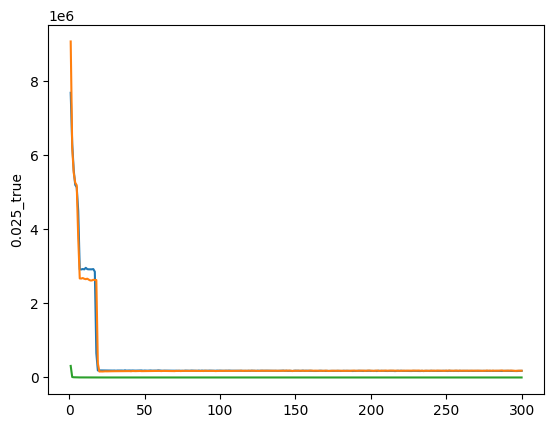

In [57]:
for col in losses_df[[f"{name}_true" for name in cols]]:

    sns.lineplot(x=[i for i in range(1, 301)], y=losses_df[col])

plt.show()

# Number of Ingredients Per Recipe

In [2]:
recipes["IngredientLen"] = recipes["RecipeIngredientParts"].str.len()

In [3]:
len(recipes[recipes["IngredientLen"] > 19])

4721

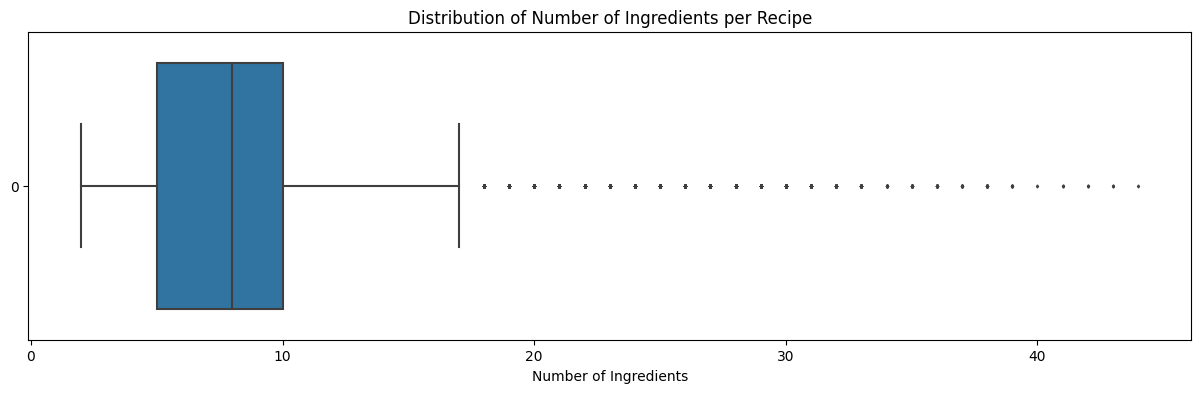

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))
ax = sns.boxplot(recipes["IngredientLen"], fliersize=1.5, orient="h")

ax.set(
    xlabel="Number of Ingredients",
    title="Distribution of Number of Ingredients per Recipe",
)

plt.show()

Statistics:

In [5]:
recipes["IngredientLen"].describe()

count    511626.000000
mean          8.054245
std           3.847504
min           2.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          44.000000
Name: IngredientLen, dtype: float64

In [6]:
recipes["IngredientLen"].median()

8.0

Number of training words:

In [7]:
recipes["IngredientLen"].sum()

4120761

# Ingredient Count Distribution

In [8]:
ingredient_counts = {}

for recipe in recipes["RecipeIngredientParts"]:

    for ingredient in recipe:

        if ingredient in ingredient_counts:

            ingredient_counts[ingredient] += 1

        else:

            ingredient_counts[ingredient] = 1

In [74]:
len(ingredient_counts)

7358

In [56]:
import numpy as np
import pandas as pd

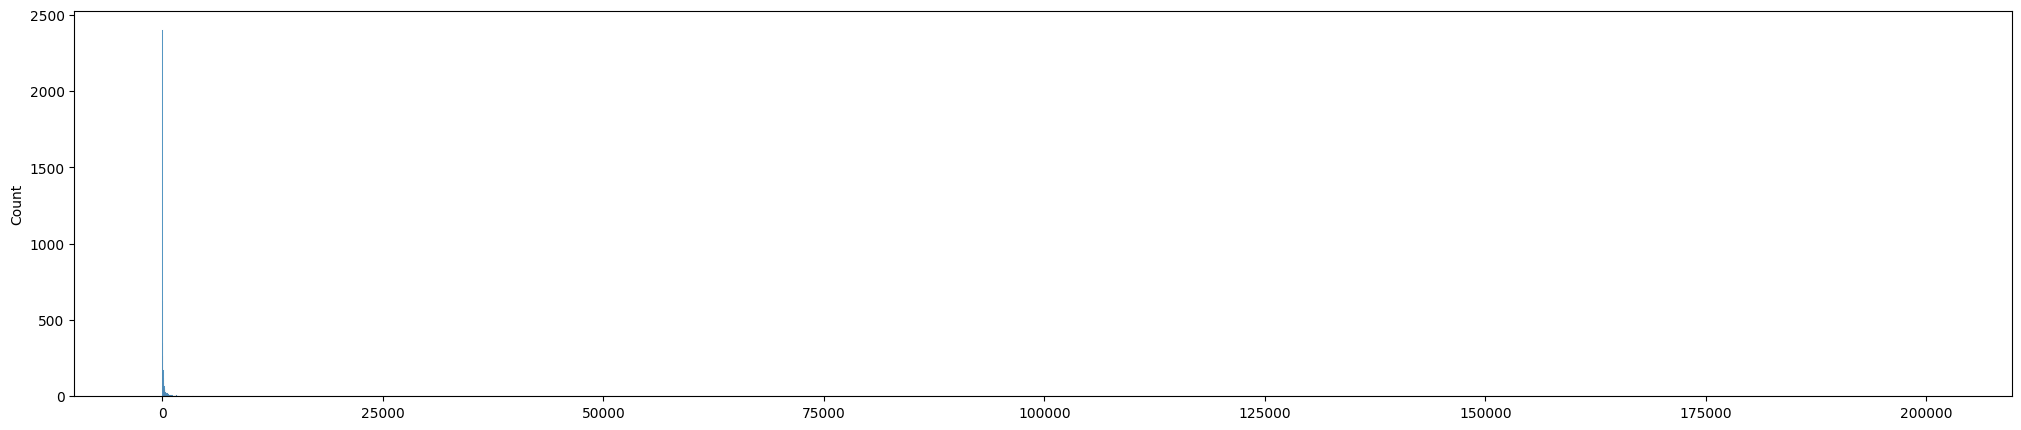

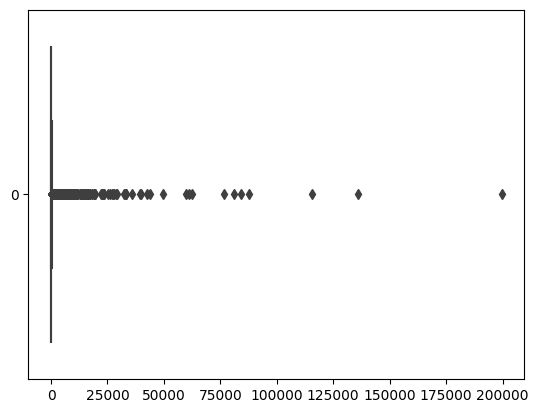

count      7358.000000
mean        560.038190
std        4452.103373
min           1.000000
25%           2.000000
50%          15.000000
75%         112.000000
max      199717.000000
dtype: float64

In [64]:
ingredient_labels = ingredient_counts.keys()
ingredient_counts_y = np.array(list(ingredient_counts.values()))

# ingredient_counts_y = ingredient_counts_y[ingredient_counts_y < np.quantile(ingredient_counts_y, 1.0)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 5))

sns.histplot(
    ingredient_counts_y[ingredient_counts_y > np.quantile(ingredient_counts_y, 0.2)],
    thresh=5,
)
plt.show()
sns.boxplot(ingredient_counts_y, orient="h")
plt.show()

display(pd.Series(ingredient_counts_y).describe())

# Vector Size

In [20]:
import numpy as np

Create co-ocurrence matrix

In [67]:
ingredients = []
ingredient_indexes = {}

recipe_ingredients = recipes["RecipeIngredientParts"]

# get matrix size 
for recipe in recipe_ingredients:
    
    for ingredient in recipe:
        if ingredient not in ingredient_indexes.keys() and :
            
            ingredient_indexes[ingredient] = len(ingredients)
            ingredients.append(ingredient)

In [68]:
len(ingredients)

3631

In [72]:
matrix = np.zeros((len(ingredients), len(ingredients)))

for recipe in recipe_ingredients:

    for ingredient in recipe:

        ingredient_index = ingredient_indexes[ingredient]

        for context_ingredient in recipe:

            context_index = ingredient_indexes[context_ingredient]

            matrix[ingredient_index][context_index] += 1
            matrix[context_index][ingredient_index] += 1

Create word-word cosine similarity matrix using co-ocurrence matrix

In [73]:
from scipy import spatial
import tqdm

similarity_matrix = np.zeros((len(ingredients), len(ingredients)))

# get each row's vector
for i in tqdm.tqdm(range(matrix.shape[0])):

    for j in range(matrix.shape[0]):

        if i == j:

            continue

        # compute similarity
        similarity = 1.0 - spatial.distance.cosine(matrix[i], matrix[j])

        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity

100%|██████████| 3631/3631 [10:38<00:00,  5.69it/s]


Save the resulting matrix to disk for re-use:

In [76]:
import pickle

with open("similarity_matrix_trimmed.npy", "wb") as f:
    np.save(f, similarity_matrix, allow_pickle=True)

In [77]:
import tqdm.notebook as tqdm

In [6]:
import numpy as np

with open("similarity_matrix.npy", "rb") as f:
    similarity_matrix = np.load(f)

For each value in the similarity matrix:

In [78]:
import networkx as nx
from networkx.algorithms import approximation


def lambda_lookup_func(i):

    if i == 3 or i == 4:
        return 6
    elif i == 5:
        return 10
    elif i == 6:
        return 16
    elif i >= 7 and i <= 13:
        return 28
    elif i == 14:
        return 30
    elif i == 15:
        return 36
    elif i == 16:
        return 42
    elif i == 17:
        return 51
    elif i == 18:
        return 61
    elif i == 19:
        return 76
    elif i == 20:
        return 96
    elif i == 21:
        return 126
    elif i == 22:
        return 176
    elif i >= 23 and i <= 41:
        return 276
    elif i == 42:
        return 288
    elif i == 43:
        return 344


lambda_lookup = {lambda_lookup_func(i) for i in range(3, 44)}

In [79]:
# build graph
G = nx.Graph()

for i in range(similarity_matrix.shape[0]):
    G.add_node(i)

In [80]:
# get unique similarity values from the similarity matrix
unique_similarities = np.unique(similarity_matrix)

In [81]:
lambdas = []

for val in tqdm.tqdm(unique_similarities, desc="outer", position=0):

    # for each cell in the similarity matrix
    for i in tqdm.tqdm(range(similarity_matrix.shape[0]), desc="inner", position=1):

        for j in range(i + 1):

            if similarity_matrix[i][j] == val:

                G.add_edge(i, j)

    max_clique = approximation.max_clique(G)

    print("got max clique")
    max_clique_size = len(max_clique)

    lambda_k = lambda_lookup[max_clique_size]

    lambdas.append(lambda_k)

    G.clear_edges()

outer:   0%|          | 0/6586847 [00:00<?, ?it/s]

inner:   0%|          | 0/3631 [00:00<?, ?it/s]

: 

: 